### **QUESTÃO 1**

In [77]:
# importa bibliotecas necessárias
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# define semente para reprodutibilidade
random.seed(42)

# le o arquivo CSV
data = pd.read_csv('iris.csv', header=0)
# data = pd.read_csv('Vehicle.csv', header=0)  # opcaoo para outro dataset

# remove linhas com valores NaN
data = data.dropna(axis='rows')

# armazena as classes únicas da última coluna
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

# obtem o numero de linhas e colunas
nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)

# lista os nomes das colunas
attributes = list(data.columns)

# Exibe as 10 primeiras linhas
data.head(10)

Matriz de atributos: Número de linhas: 150  colunas:  5


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [78]:
# converte o DataFrame para array Numpy
data = data.to_numpy()

# obtem o numero de linhas e colunas
nrow, ncol = data.shape

# separa a ultima coluna
y = data[:, -1]

# separa as colunas de atributos
X = data[:, 0:ncol-1]

In [79]:
# importa o StandardScaler para normalizacao
from sklearn.preprocessing import StandardScaler

# ajusta o scaler aos dados e normaliza
scaler = StandardScaler().fit(X)

# aplica a normalizacao aos dados
X = scaler.transform(X)

In [80]:
# exibe os parametros
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Desvio Padrao: [1. 1. 1. 1.]


In [81]:
# importa funcao para dividir o conjunto de dados
from sklearn.model_selection import train_test_split

# define a proporção para o conjunto de treinamento
p = 0.7

# divide os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=p, random_state=42)

In [82]:
# importa o classificador K-vizinhos mais proximos
from sklearn.neighbors import KNeighborsClassifier

# define o numero de vizinhos
k = 13

# inicializa e ajusta o modelo K-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
model.fit(x_train, y_train)

# faz a predicao no conjunto de teste
y_pred = model.predict(x_test)

In [83]:
# importa a funcao para calcular a acuracia
from sklearn.metrics import accuracy_score

# calcula a acuracia da predicao
score = accuracy_score(y_pred, y_test)

# exibe a acuracia
print('Accuracy:', score)

Accuracy: 1.0


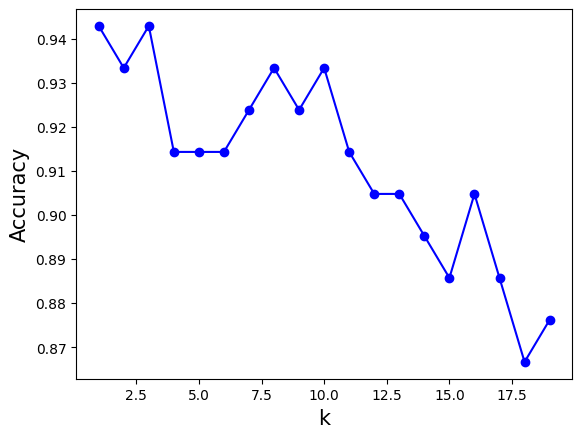

Melhor k: 1


In [84]:
# importa funcoes para validacao cruzada e classificador K-vizinhos
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

# define o numero de folds para validacao cruzada
nkf = 5

# inicializa listas para armazenar valores de k e suas respectivas acuracias
vk = []
vscore = []

# itera sobre diferentes valores de k
for k in range(1, 20):
    # cria o modelo K-vizinhos com o valor de k atual
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # realiza validacao cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)

    # armazena a acuracia media para o valor de k
    vscore.append(cv['test_score'].mean())
    vk.append(k)

# plota os valores de k contra a acuracia
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show(True)

# determina o melhor valor de k
best_k = np.argmax(vscore) + 1
print('Melhor k:', best_k)

In [85]:
# importa a funcao para calcular a acurácia
from sklearn.metrics import accuracy_score

# ajusta o modelo usando o melhor valor de k
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(x_train, y_train)

# faz a predição no conjunto de teste
y_pred = model.predict(x_test)

# exibe a acurácia da predicao
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.9777777777777777


### **QUESTÃO 2**

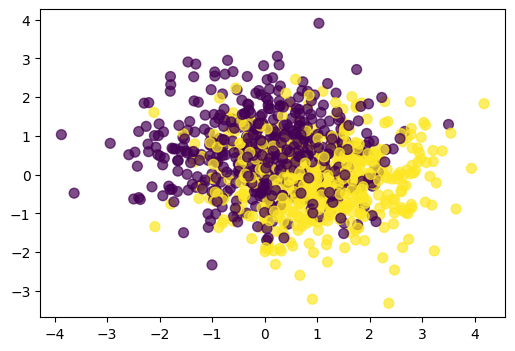

In [86]:
# importa funcoes para plotar regioes de decisao e manipulacao de dados
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# define o tamanho da figura
plt.figure(figsize=(6, 4))

# define o número de amostras
n_samples = 1000

# gera um conjunto de dados em formato de "moons" com ruido
data = datasets.make_moons(n_samples=n_samples, noise=0.9)
X = data[0]
y = data[1]

# plota o conjunto de dados gerado
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)

# exibe o grafico
plt.show(True)

**REGIÕES PELO MÉTODO KNN**

In [87]:
# define os centros dos grupos (clusters)
centers = [(0, 0), (1, -1), (-1, 1)]

# gera um conjunto de dados com blobs baseados nos centros definidos
X, y = skdata.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, centers=centers, shuffle=False, random_state=42)

In [88]:
# monta a matriz de atributos, combinando X e y
d = np.column_stack((X, np.transpose(y)))

# converte para um DataFrame do Pandas
data = DataFrame(data=d, columns=['X1', 'X2', 'y'])

# define os nomes das features
features_names = ['X1', 'X2']

# obtem os rotulos de classe unicos
class_labels = np.unique(y)

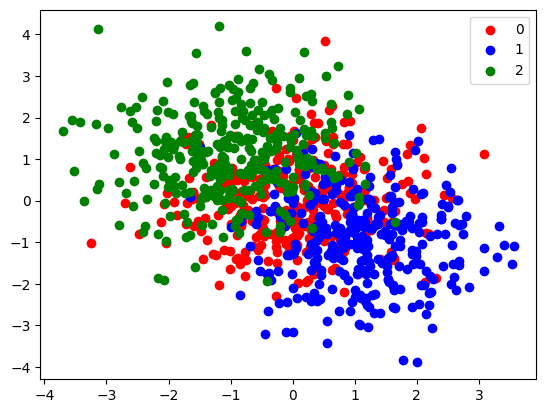

In [89]:
# define as cores para cada classe
colors = ['red', 'blue', 'green', 'black']

# itera sobre as classes e plota os dados com cores correspondentes
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind, 0][0], X[ind, 1][0], color=colors[aux], label=c)
    aux += 1

# salva o grafico em um arquivo
plt.savefig('knn_ex.eps')

# adiciona a legenda ao grafico
plt.legend()

# exibe o grafico
plt.show()

In [ ]:
# define uma lista de valores para k
vk = [1, 5, 10, 20, int(n_samples/2)]

# itera sobre os diferentes valores de k
for k in vk:

    # treina o classificador KNN com o valor de k atual
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X, y)

    # mostra as regioes de decisao
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = ' + str(k))

    # exibe o gráfico para o valor de k
    plt.show()

**REGIÕES PELO MÉTODO REGRESSÃO LOGÍSTICA**

In [ ]:
# importa o modelo de regressao logistica
from sklearn.linear_model import LogisticRegression

# define o tamanho da figura
plt.figure(figsize=(6, 4))

# define o numero de amostras
n_samples = 1000

# gera um conjunto de dados em formato de "moons" com ruído
data = datasets.make_moons(n_samples=n_samples, noise=0.9)
X = data[0]
y = data[1]

# plota os dados gerados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)

# exibe o grafico
plt.show(True)

In [ ]:
# mostra os dados e aplica uma cor de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind, 0][0], X[ind, 1][0], color=colors[aux], label=c)
    aux += 1

# salva o grafico em um arquivo
plt.savefig('plot_ex.eps')

# adiciona a legenda ao grafico
plt.legend()

# exibe o gráfico
plt.show()

# treina o classificador de regressao logistica
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X, y)

# mostra as regioes de decisao
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')

# exibe o grafico das regioes de decisao
plt.show()

### **QUESTÃO 3**

In [ ]:
# importa as bibliotecas necessarias
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit

# define a semente para reprodutibilidade
random.seed(42)

# le os dados do arquivo CSV
data = pd.read_csv('iris.csv', header=0)
# data = pd.read_csv('Vehicle.csv', header=0)  # opcao para outro dataset

# remove as linhas com valores NaN
data = data.dropna(axis='rows')

# armazena os nomes das classes presentes na ultima coluna
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

# exibe o numero de linhas e colunas na matriz de atributos
print("Número de linhas e colunas na matriz de atributos:", data.shape)

# lista os nomes das colunas
attributes = list(data.columns)

# exibe as 10 primeiras linhas do dataset
data.head(10)

In [ ]:
# convertendo para o formato Numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
# seleciona o conjunto de treinamento e teste usando o metodo hold-out
from sklearn.model_selection import train_test_split

# define a fracao dos dados que sera usada como conjunto de teste
p = 0.2  # 20% dos dados para teste

# divide os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=42)

In [ ]:
# realiza a classificacao por regressao logistica
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# inicializa o modelo de regressao logistica
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

# treina o modelo usando o conjunto de treinamento
model.fit(x_train, y_train)

# faz a predicao no conjunto de teste
y_pred = model.predict(x_test)

# exibe a acuracia do modelo
print('Acurácia:', model.score(x_test, y_test))